<a href="https://colab.research.google.com/github/vienneanggelica/ProjectMovie/blob/master/Submission_vienne_anggelica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nama : Vienne Anggelica Kurnia 
*   Univ : Politeknik Negeri Padang
*   BP : 17
*   Domisili : Bukittinggi, Sumatera Barat

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-15 06:15:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.57MB/s    in 52s     

2020-10-15 06:16:04 (5.96 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [5]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [6]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [7]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [8]:
#membuat direktori
base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

#membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
#membuat nama directori
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [10]:
#memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

#memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

#memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [13]:
# membuat direktori rock paper scissors pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# membuat direktori rock paper scissors pada direktori data validation
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat direktori baru di dalam direktori train dan validation
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)


In [14]:
import shutil
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [15]:
#membuat image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 42s - loss: 1.0574 - accuracy: 0.4125 - val_loss: 0.7756 - val_accuracy: 0.6125
Epoch 2/20
25/25 - 41s - loss: 0.5782 - accuracy: 0.7563 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 42s - loss: 0.3135 - accuracy: 0.8925 - val_loss: 0.3242 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 41s - loss: 0.2705 - accuracy: 0.9050 - val_loss: 0.1635 - val_accuracy: 0.9563
Epoch 5/20
25/25 - 41s - loss: 0.2494 - accuracy: 0.9150 - val_loss: 0.2110 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 41s - loss: 0.1628 - accuracy: 0.9388 - val_loss: 0.2637 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 42s - loss: 0.2423 - accuracy: 0.9200 - val_loss: 0.2285 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 41s - loss: 0.1861 - accuracy: 0.9325 - val_loss: 0.1383 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 41s - loss: 0.2144 - accuracy: 0.9337 - val_loss: 0.1523 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 41s - loss: 0.1287 - accuracy: 0.9638 - val_loss: 0.1713 - val_accuracy: 0.9438
Epoch 11/

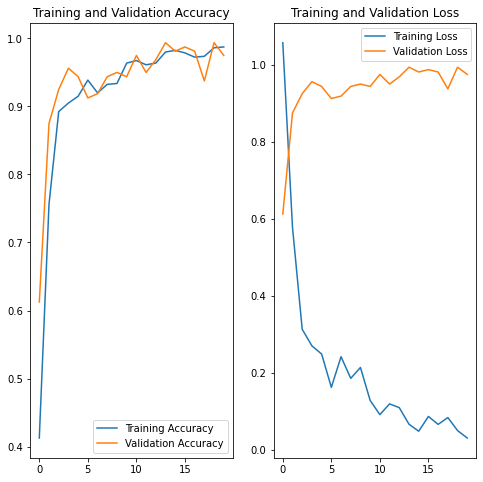

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_acc, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S (1).png
scissors


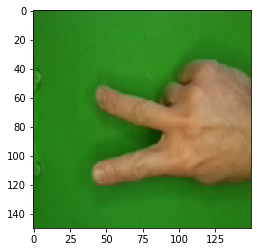

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  if hasil==0:
    print('paper')
  elif hasil==1:
    print('rock')
  else:
    print('scissors')
  